In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [239]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [104]:
data.head(4)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN


In [145]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

**With value counts we found that there are some values in the dataset with 0 and ? which we will fill with replace method.**

In [240]:
#Replacing 0 in the entire dataset.
data.replace(0,method='bfill', inplace = True)
data.replace(0,method='ffill', inplace = True)
data.replace('?',method='ffill', inplace = True)
data.replace('?',method='bfill', inplace = True)

months_as_customer             None
age                            None
policy_number                  None
policy_bind_date               None
policy_state                   None
policy_csl                     None
policy_deductable              None
policy_annual_premium          None
umbrella_limit                 None
insured_zip                    None
insured_sex                    None
insured_education_level        None
insured_occupation             None
insured_hobbies                None
insured_relationship           None
capital-gains                  None
capital-loss                   None
incident_date                  None
incident_type                  None
collision_type                 None
incident_severity              None
authorities_contacted          None
incident_state                 None
incident_city                  None
incident_location              None
incident_hour_of_the_day       None
number_of_vehicles_involved    None
property_damage             

### EDA

In [149]:
# Lets check the shape first
data.shape

(1000, 40)

There are 100 rows and 40 columns in the dataset

In [151]:
#Lets now check all the columns and the dtype of each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Total entries the dataset for each column is 1000, has three data types: float64(2), int64(17), object(21)

In [6]:
#Lets check for the total number of null values and fill those with best methods

data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

With the above information we see there are null values in the column _c39

In [241]:
#lets drop the column with null values

data.drop('_c39', axis = 1, inplace=True)

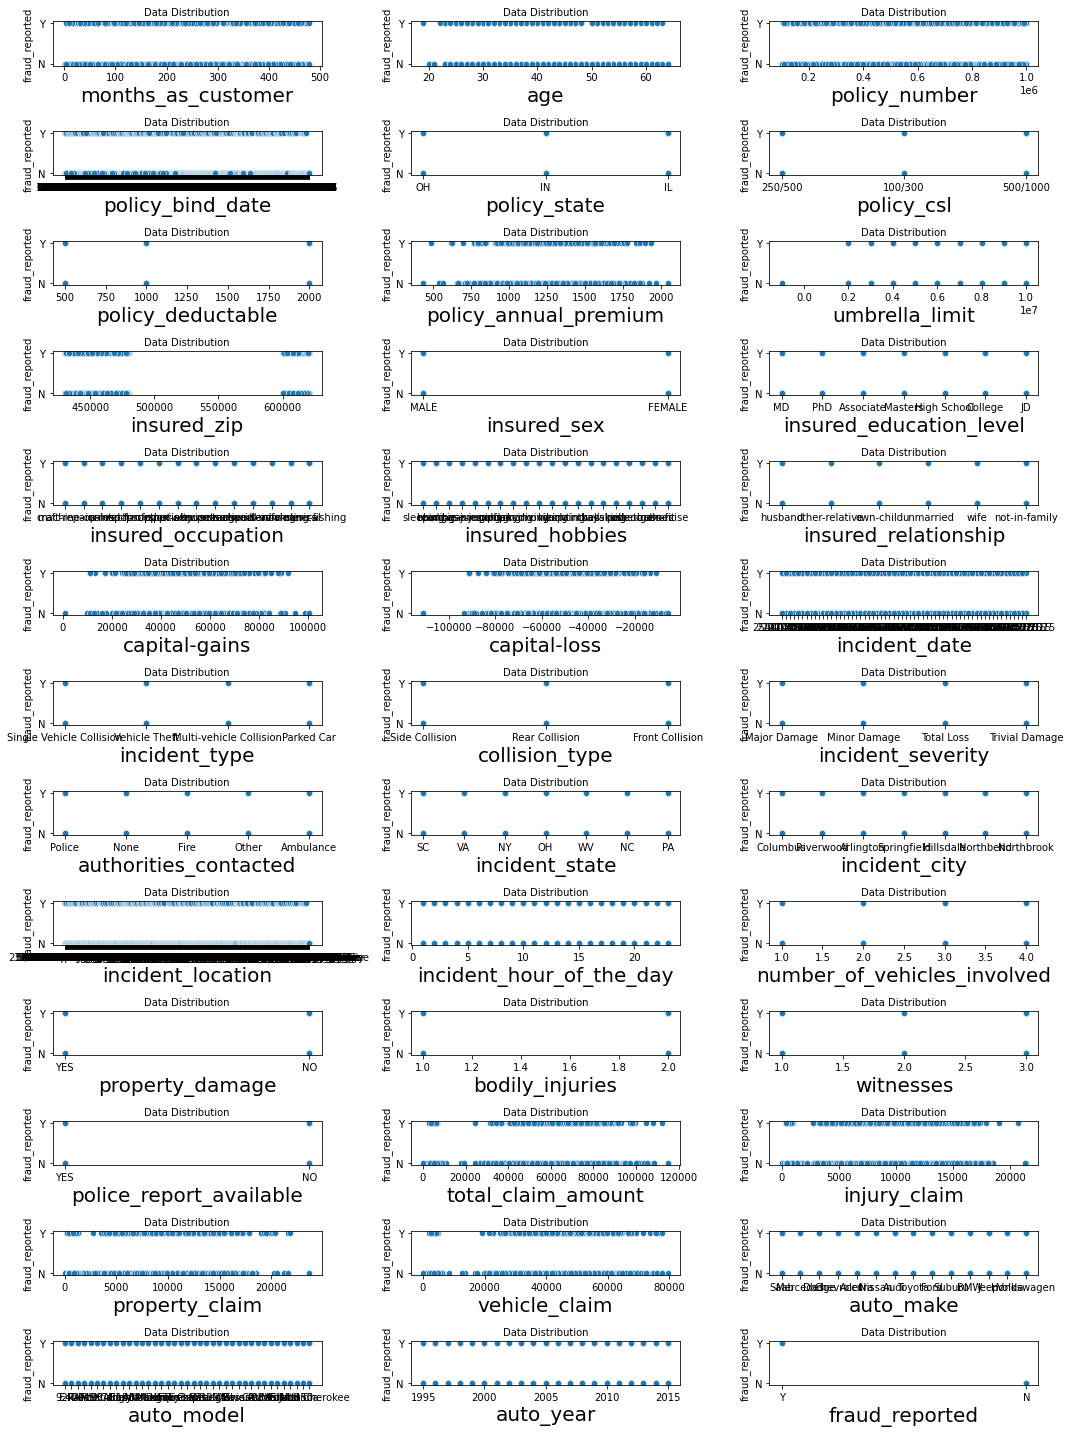

In [242]:
#Lets now plot scatter plot for each column in x with respect to y to understand the data.

plt.figure(figsize = [15,20])
plotnumber = 1

for column in data:
    if plotnumber<=39:
        ax = plt.subplot(13,3,plotnumber)
        sns.scatterplot(x = data[column], y= data['fraud_reported'] )
        plt.xlabel(column, fontsize = 20)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

With the above plot lets find out what we observed.

**Vehicle Claim** Less frauds detected in it as it increased.
**property_claim** More frauds as the value increased and less as it descreased.
**injury_claim** More frauds as the value increased and less as it descreased.
**total_claim_amount** Less frauds as the value increased and less as it descreased.
**captal_gains** Less frauds as the value increased and less as it descreased.
**captal_loss** Less frauds as the value increased and less as it descreased.

In [12]:
#lets see the Standard Deviation, Min Value, 25 % , 75% and maximum value of the colums

data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


We see the mean, standard deviation and 1st, 2nd and 3rd quartile with it.

In [243]:
#Lets drop the column loan Id as it would not be needed.
data.drop('policy_bind_date',axis=1, inplace = True)

In [244]:
#Lets first convert the string values in int for further processing of data with the help of label encoder.

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for i in data.columns:
    if data[i].dtypes=="object":
        data[i] = LE.fit_transform(data[i].values.reshape(-1,1))

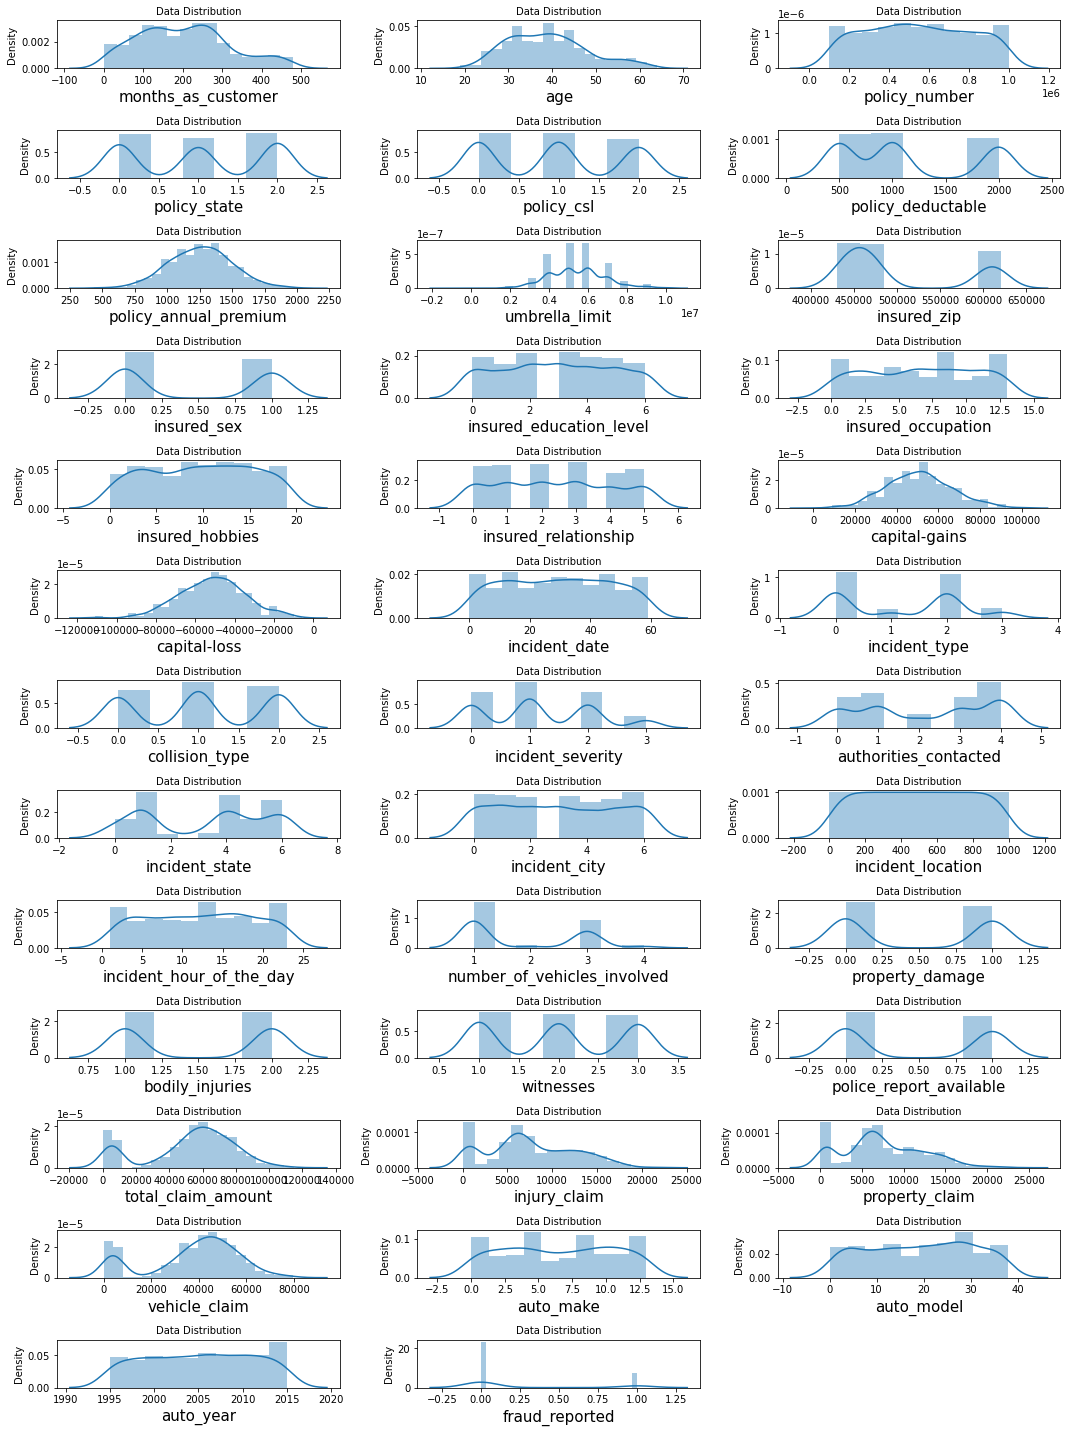

In [245]:
#Checking skewness in the data with the help of distplot

plt.figure(figsize = [15,20])
plotnumber = 1

for column in data:
    if plotnumber<=39:
        ax = plt.subplot(13,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

In [246]:
data.skew()

months_as_customer             0.362579
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 0.240856
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.141356
capital-loss                  -0.112631
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.050207
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.024951


**This shows that there is skewness in the column**
2- insured_zip
3- total_claim_amount
4- vehicle_claim

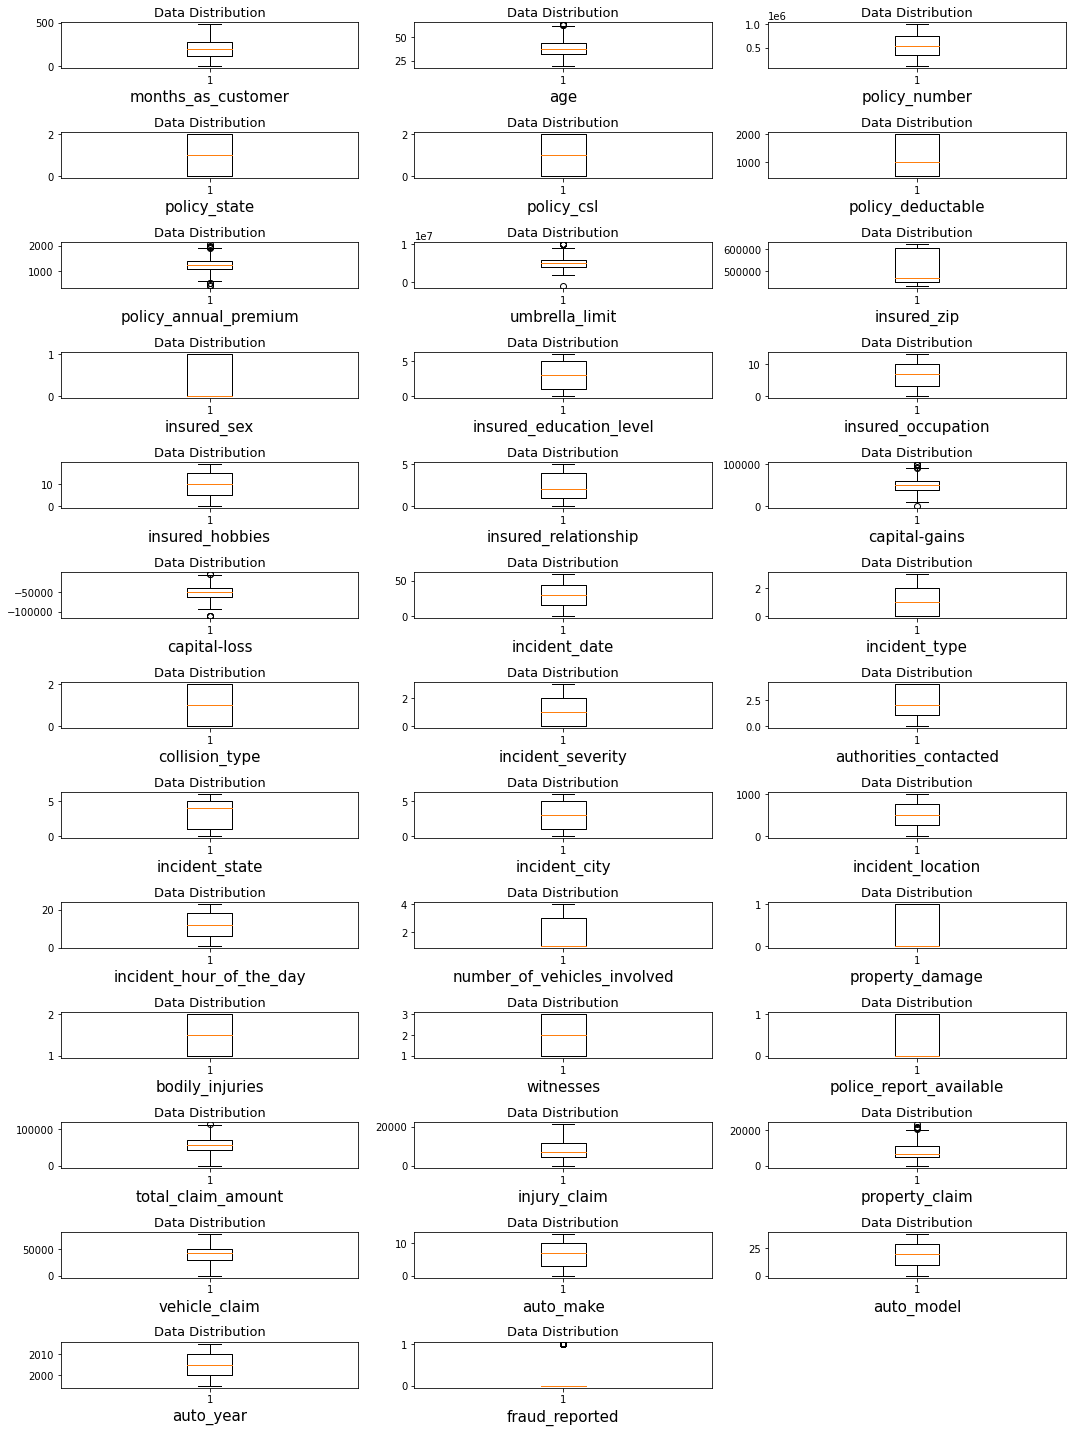

In [158]:
#Checking for outliers

plt.figure(figsize = [15,20])
plotnumber = 1

for column in data:
    if plotnumber<=39:
        ax = plt.subplot(13,3,plotnumber)
        plt.boxplot(data[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 13)
    plotnumber += 1
plt.tight_layout()

With above observation we see there are lot of outliers in the column policy_annual_premium,age, property_claim, capital_gains.

In [159]:
#Now will check the collinearity among features
corr_mat = data.corr()
corr_mat

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.919468,0.060220,0.003851,-0.022228,0.026026,0.006758,0.037640,0.014956,0.064720,...,0.023010,-0.049197,0.060371,0.074418,0.041677,0.058881,0.041944,0.005367,-0.002109,0.018528
age,0.919468,1.000000,0.059413,-0.014533,-0.015185,0.029188,0.014404,0.026873,0.025604,0.073337,...,0.021005,-0.042590,0.069863,0.085102,0.065710,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.060220,0.059413,1.000000,0.072815,0.038917,-0.006738,0.022566,0.016071,0.007083,0.004564,...,-0.014069,0.010310,-0.018009,-0.028009,-0.020726,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_state,0.003851,-0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,-0.062727,0.008777,-0.020481,...,-0.006930,0.075587,-0.006002,-0.042271,0.007038,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.022228,-0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,-0.019986,0.006879,-0.010757,...,0.045584,-0.014257,-0.055758,-0.085720,-0.035088,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026026,0.029188,-0.006738,0.010033,0.003384,1.000000,-0.003245,0.009281,0.004545,-0.009733,...,0.082705,0.045515,0.022839,0.024557,0.067016,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.006758,0.014404,0.022566,0.012455,0.023978,-0.003245,1.000000,-0.012235,0.032354,0.038853,...,-0.026513,0.021950,0.009094,-0.024730,-0.014291,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.037640,0.026873,0.016071,-0.062727,-0.019986,0.009281,-0.012235,1.000000,0.033384,-0.030539,...,-0.036634,-0.011680,-0.051873,-0.026846,-0.046391,-0.056651,0.010740,0.032849,0.018067,0.029456
insured_zip,0.014956,0.025604,0.007083,0.008777,0.006879,0.004545,0.032354,0.033384,1.000000,-0.036942,...,-0.001958,0.047052,-0.033873,-0.006517,-0.013495,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.064720,0.073337,0.004564,-0.020481,-0.010757,-0.009733,0.038853,-0.030539,-0.036942,1.000000,...,0.004226,-0.047891,-0.023727,-0.002296,-0.015441,-0.029609,0.026457,-0.018421,-0.028247,0.030873


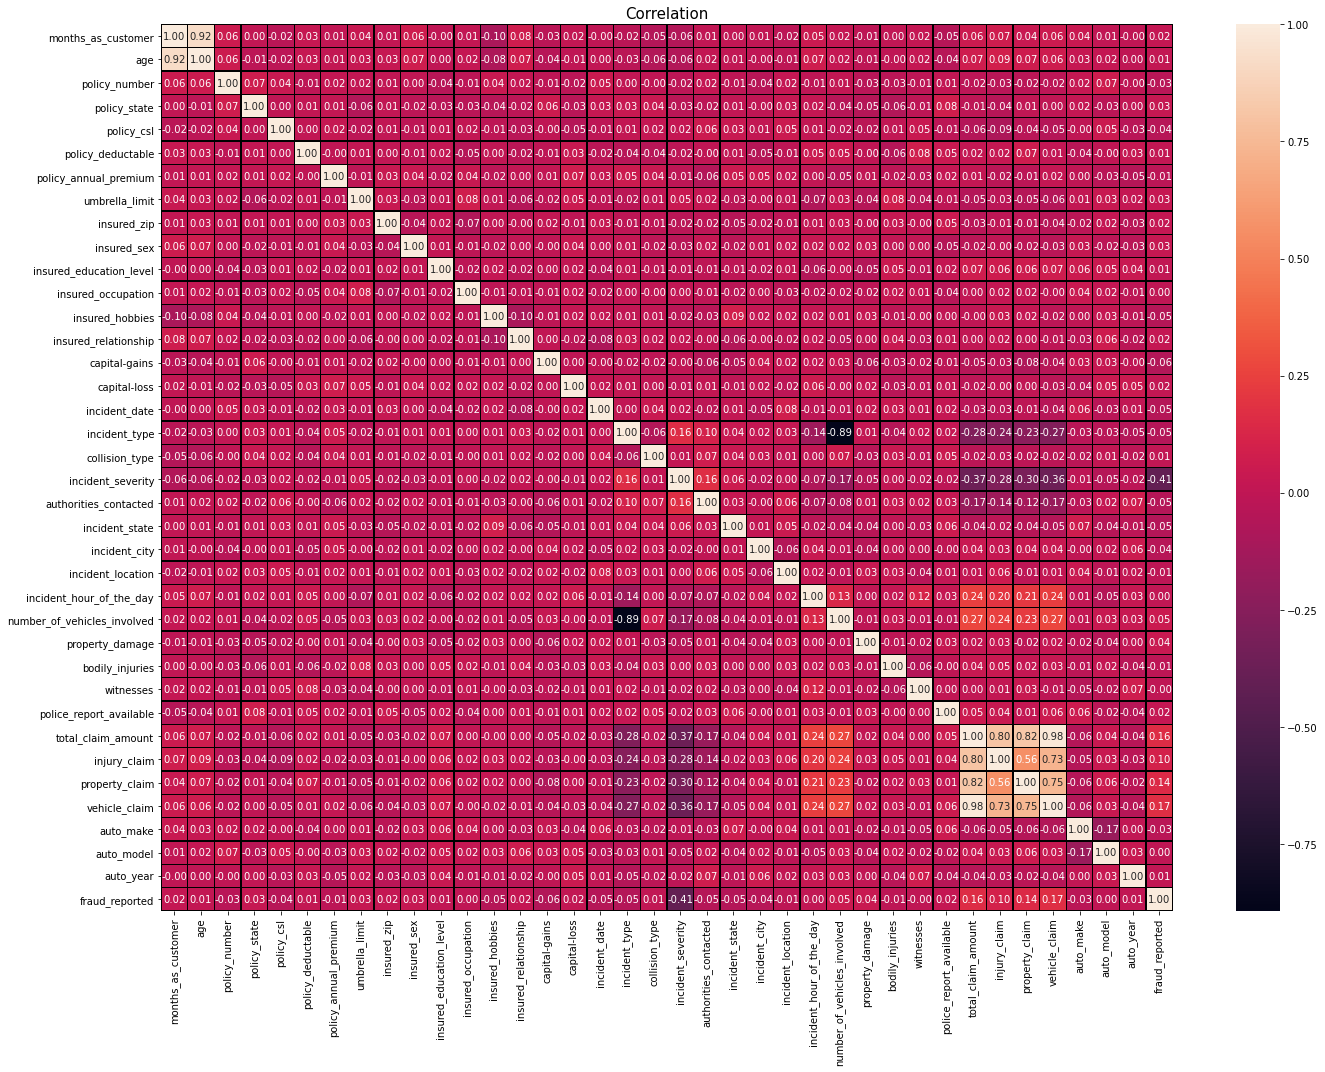

In [160]:
plt.figure(figsize = [20,15])
sns.heatmap(corr_mat,annot=True, linewidths=0.3,linecolor="black",fmt='.2f')
plt.title('Correlation', fontsize=15)
plt.tight_layout()

#### Observation from the above plot.

Max Correlation of the output with the features columns is vehicle_claim.

Min Correlation of the output with the features columns is with incident_severity.

Also we can see that there is too much corelation between age and months_as_customer, vehicle_claim and total_claim_amount.

### Data Cleaning :

**Removing Outliers**

In [253]:
#Dropping age column as it has too much co relation with month as customer and among the two it has less relation with the output.
data.drop(['age'], axis = 1, inplace = True)

In [254]:
#Dropping total_claim_amount column as it has too much co relation with vehicle_claim and among the two it has less relation with the output
data.drop(['total_claim_amount'], axis = 1, inplace = True)

In [256]:
### Now Will remove outliers with the help of Z-score Method.

from scipy import stats

z = np.abs(stats.zscore(data))
print(z)
print('\n Row Numbers ==>', np.where(z>3)[0])
print('\n Column Numbers ==>', np.where(z>3)[1])

[[1.07467401 0.09595307 1.18717314 ... 1.64574255 0.1834404  1.74601919]
 [0.20548498 0.79152739 0.01685641 ... 0.65747047 0.31549088 1.74601919]
 [0.61155271 0.55056594 1.18717314 ... 0.95970204 0.31549088 0.57273139]
 ...
 [0.64632027 1.44891961 1.18717314 ... 0.02857005 1.5139238  0.57273139]
 [2.20461975 0.04786687 1.22088596 ... 1.28637088 1.18130295 0.57273139]
 [2.18723597 0.03830297 1.18717314 ... 0.65747047 0.31549088 0.57273139]]

 Row Numbers ==> [ 86 112 113 114 115 229 248 290 428 429 430 500 533 591 763 804 805 806
 807 815 816]

 Column Numbers ==> [13  6  6  6  6  5  5  6  6  6  6 30 13 30  5 14 14 14 14 13 13]


In [257]:
##Storing the zcore > 3 in index

index = np.where(z>3)[0]

#Deleting the indexes having outliers stored in the above variable

New_df = data.drop(data.index[index])

**Removing Skewness**

In [258]:
q = New_df['insured_zip'].quantile(0.99)
New_df = New_df[New_df['insured_zip']<q]

q = New_df['vehicle_claim'].quantile(0.99)
New_df = New_df[New_df['vehicle_claim']<q]

In [259]:
#Separating label and features

x = New_df.drop(['fraud_reported'], axis = 1)
y = New_df['fraud_reported']

In [260]:
New_df['fraud_reported'].value_counts() #We will use stratify for balancing it.

0    724
1    235
Name: fraud_reported, dtype: int64

### Model Building:

In [261]:
#Data is now cleaned, skewness and outliers removed. We will now build the model.

In [262]:
from sklearn.metrics import accuracy_score

In [263]:
from sklearn.metrics import confusion_matrix, classification_report

In [264]:
from sklearn.model_selection import train_test_split

In [265]:
#Scaling the data

In [266]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [267]:
#Splitting the data into train and test

In [308]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 1000, stratify = y)

In [309]:
#Model Building

In [310]:
##Lets see which model will give the best output

In [311]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [312]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
svc = SVC()

In [313]:
#training with the all of them

lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
svc.fit(x_train,y_train)

print("All Models Trained")

All Models Trained


In [314]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)
svc.score(x_test,y_test)

print("All scores Captured")

All scores Captured


In [315]:
#Lets check the roc_auc_score
#for Logistic Regression
roc_auc_score(y_test,lr.predict(x_test))

0.661041819515774

In [316]:
#for Decision Tree
roc_auc_score(y_test,dt.predict(x_test))

0.7004402054292003

In [317]:
#for Random Forest
roc_auc_score(y_test,rf.predict(x_test))

0.6000733675715333

In [318]:
#for KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.5192956713132796

In [319]:
#For support vectore classifier
roc_auc_score(y_test,svc.predict(x_test))

0.5071900220102714

In [320]:
#Now plotting roc_auc_curve for all the columns

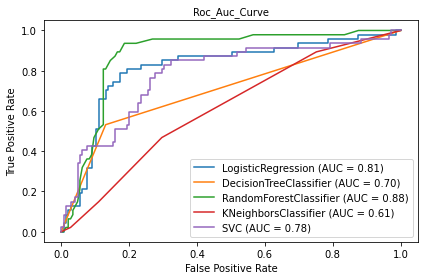

In [321]:
curve = plot_roc_curve(lr,x_test,y_test)

plot_roc_curve(dt,x_test,y_test,ax=curve.ax_)

plot_roc_curve(rf,x_test,y_test,ax=curve.ax_)

plot_roc_curve(kn,x_test,y_test,ax=curve.ax_)

plot_roc_curve(svc,x_test,y_test,ax=curve.ax_)

plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

With above plotting we can see area covered by Random Forest Model is the most hence he will chose it further.

**Getting all the other scores for RandomForest**

In [322]:
rf = RandomForestClassifier(criterion='entropy',n_estimators=120, random_state=400)

In [323]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=120, random_state=400)

In [324]:
y_pred = rf.predict(x_test)

In [325]:
# For Accuracy Score

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.796875

In [326]:
#For Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[138,   7],
       [ 32,  15]], dtype=int64)

In [327]:
#AUC SCORE
roc_auc_score(y_test,y_pred)

0.6354365370506236

In [328]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       145
           1       0.68      0.32      0.43        47

    accuracy                           0.80       192
   macro avg       0.75      0.64      0.66       192
weighted avg       0.78      0.80      0.77       192



**Cross Validation**

In [329]:
#Doing Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(rf,x,y,cv=5)

cvs.mean()

0.7768542757417103

Since the accuracy score and cross validation score are almost same we can say that the model is neither overfitting or underfitting

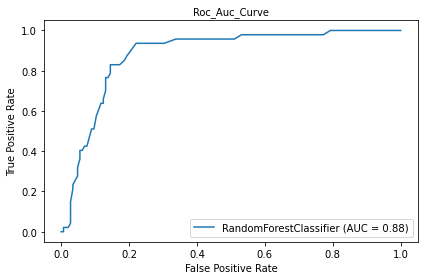

In [330]:
#Plotting ROC_AUC Curve for the model
plot_roc_curve(rf,x_test,y_test)
plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

### HyperParameter Tuning:

In [331]:
from sklearn.model_selection import GridSearchCV

In [332]:
params = {'n_estimators':[100,110,120],
         'criterion':['gini','entropy'],
         'max_depth':[12,7,6],
         'min_samples_leaf': [7,6,5],
         'min_samples_split': [5,4,3]}

In [333]:
grid = GridSearchCV(rf, param_grid= params, cv = 3, n_jobs=-1)

In [334]:
grid.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=120,
                                              random_state=400),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [12, 7, 6], 'min_samples_leaf': [7, 6, 5],
                         'min_samples_split': [5, 4, 3],
                         'n_estimators': [100, 110, 120]})

In [335]:
print('Best Estimators == > \n', grid.best_params_)

Best Estimators == > 
 {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}


In [336]:
#Reinstantiating classifier with the best parameters

clf = grid.best_estimator_

In [337]:
clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_leaf=5,
                       min_samples_split=5, random_state=400)

In [338]:
y_pred =  clf.predict(x_test)

In [339]:
# For Accuracy Score

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7916666666666666

In [340]:
#For Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[137,   8],
       [ 32,  15]], dtype=int64)

In [341]:
#AUC SCORE
roc_auc_score(y_test,y_pred)

0.6319882611885546

In [342]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       145
           1       0.65      0.32      0.43        47

    accuracy                           0.79       192
   macro avg       0.73      0.63      0.65       192
weighted avg       0.77      0.79      0.76       192



In [343]:
##Cross Validating.

cvs = cross_val_score(clf,x,y,cv=5)

cvs.mean()

0.7695789703315882

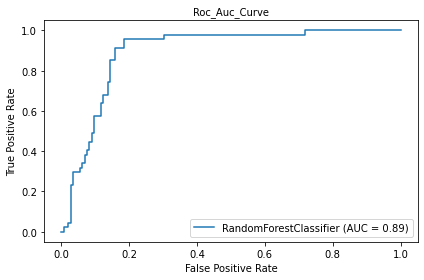

In [344]:
#Plotting ROC_AUC Curve for the model
plot_roc_curve(clf,x_test,y_test)
plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

### Model Saving :

In [ ]:
#Saving the model

import joblib

filename = 'Insurance Fraud Detection.sav'
joblib.dump(clf, filename)